# DESAFIO 04 - CICLO DE RANKINE

In [1]:
#importar bibliotecas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn-bright')
import seaborn as sns
from scipy import integrate

**Máquina de Calor:** Máquinas de calor ou _"heat engines"_ são dispositivos que absorvem calor e convertem parte dessa energia em trabalho. Um exemplo interessante, que será utilizado aqui, é a máquina a vapor, presente em várias usinas de eneriga, como a geotérmica, termelétrica e nuclear. Outro exemplo possível é a máquina de combustão interma, usada em carros (nota-se que tecnicamente não absorve calor, mas pode-se a tratar como uma máquina de calor.

**Ciclo de Carnot:** Dado um T<sub>h</sub> e T<sub>c</sub>, o ciclo de Carnot é aquele que consegue atingir eficiência máxima. Para tal, necessita-se de uma expansão isotérmica em T<sub>h</sub>, expansão adiabática de T<sub>h</sub> para T<sub>c</sub>, compressão isotérmica em T<sub>c</sub> e compressão adiabática de T<sub>c</sub> para T<sub>h</sub>, assim como na Figura 1. Nota-se que uma expansão isotérmica implica na não "criação" de entropia, de modo que toda a entropia da fonte quente é despejada na fonte fria. Isso explica a máxima eficiência do ciclo.

<dt>
<center>
<img src="ciclo_carnot_exemplo.png" style="height: 600px;"/>
</center>
</dt>

<center>
    Figura 1 - Ciclo de carnot para um gás monoatômico
<center>

#### Eficiência do Ciclo de Carnot
Sabe-se que a eficiência pode ser calculada como: $$ \\ $$
$$ e ≡ \frac{beneficio}{custo} = \frac{W}{Q_h} \\ $$
Pela Primeira Lei da Termodinâmica: $$ Q_h = Q_c + W \\$$
Então, tem-se: $$ e = 1 - \frac{Q_c}{Q_h} \\ $$
Ainda, pela Segunda Lei da Termodinâmica: $$ \frac{Q_c}{Q_h} ≥ \frac{T_c}{T_h} \\ $$
Assim, pode-se concluir que a eficiência pode ser dada como: $$ e ≤ 1 - \frac{T_c}{T_h} \\ $$

### **SOBRE O CICLO DE RANKINE IDEAL**

**Ciclo de Rankine**: O Ciclo de Rankine descreve um processo pelo qual, por meio de um máquina a vapor, pode-se converter energia proveniente de fissão nuclear, energia solar, geotérmica e, como aplicado neste notebook, pela combustão em energia elétrica (fonte quente). A combustão pode ser proveniente de vários materiais, como biomassa, etanol, gás natural, petróleo, carvão. Neste notebook o combustível é o benzeno. Para retirar o calor do sistema se utiliza, em geral rios, corpos-d'água perto da usina e até o ar ambiente (fonte fria). A eficiência do cilco depende, entre outros fatores, da diferença de temperatura entre a fonte quente e a fonte fria, como postulado pelo Teorema de Carnot.
## Exemplo:

<dt>
<center>
<img src="Diagrama_ciclo.png" style="height: 600px;"/>
</center>
</dt>

<center>
Figura 2 - Ciclo de Rankine
</center>
Vemos que o ciclo pode ser separado em 4 processos:

#### 1 - 2
Aqui ocorre a compressão do fluído por uma bomba, num ciclo ideal, podemos aproximar essa compressão como isentrópica. No entanto, num ciclo real, é importante considerar que há uma certa irreversibilidade do bombeamento, e que a entropia aumenta um pouco.
#### 2 - 3
O líquido que foi pessurizado pela bomba entra no boiler, onde irá sofrer aumento da temperatura e da entropia, até chegar na mudanca de fase, onde a temperatura é constante, até chegar no ponto 3. A energia usada nesse processo é a energia da queima do benzeno, que foi calculada no desafio 3.
#### 3 - 4
O vapor chega à turbina, onde vai ser gerado trabalho. A energia térmica do vapor é uma energia de alta entropia, já a energia gerada na forma de trabalho (rotação da turbina) é de baixa entropia, por isso podemos considerar o processo 3 - 4 como aproximadamente isentrópico. Novamente lembrando que num ciclo real também não será isentrópico por conta da segunda lei da termodinâmica.
#### 4 - 1
Por fim, o vapor chega a um condensdor, onde vai eliminar energia para a fonte fria (a temperatura ambiente, no nosso caso) e voltar para a fase líquida, para recomeçar o ciclo.



Para o nosso ciclo, precisamos calcular os nossos parâmetros, como a temperatura e entropia em cada um dos pontos do ciclo. Além da eficiência do nosso ciclo.

<dt>
<center>
<img src="rankine_cycle_example.png" style="height: 600px;"/>
</center>
</dt>

<center>
Figura 3 - Esquemático do Ciclo de Rankine
</center>

**Ciclo de Rankine Não Ideal:** Apresenta uma eficiência inferior em relação ao Ciclo de Rankine Ideal, resultado da irreversibilidade de vários componentes do sistema. Por exemplo, nesse ciclo, considera-se a fricção do fluido, que causa redução de pressão no boiler, o que diminui a pressão de saída. Pode-se considerar, também, as perdas de calor duante o processo, o que reduz o trabalho (W<sub>net</sub>) da turbina. Além disso, a compressão na bomba e a expansão volumétrica na turbina não são isentrópicas, o que significa que essas etapas são irreversíveis, entropia é produzida e aumenta a quantidade de trabalho requerida na bomba, além de diminuir o trabalho produzido na turbina. Neste notebook será usado o Ciclo de Rankine Ideal.

**Ciclo de Carnot x Ciclo de Rankine:** No Ciclo de Carnot o rendimento teórico é sempre máximo na conversão para energia mecânica. Isso ocorre pois a temperatura do fluido é infinitesimalmente diferente da fonte fria e fonte quente (a transferência de energia ocorre por mudança de volume do fluido nas respectivas etapas), com o fim de não criar entropia. Assim, o fluxo de energia tem eficiência máxima, mas é muito demorado. É exatamente por isso que ele o cilco de Carnot é extremamente eficiente, mas muito pouco prático. Já o ciclo de Rankine, há geração de entropia, o que o torna menos eficiente que o ciclo de Carnot. O rendimento é, de fato, a principal diferença entre os vários sitemas que utilizam o Ciclo de Rankine, o que inclui termelétricas, usinas nucleares e aplicações fotovoltaicas, por exemplo.

**Água e Ciclo de Rankine:** No Ciclo de Rankine se pode utilizar uma variedade de fluidos: metanol e CFC são exemplos possíveis. Entretanto, é mais comum que seja utilizado água para o processo. Isso se deve pois a água é uma substância de abundância em meios naturais, barata e alta capacidade calorífica. A alta capacidade calorífica é extremamente interessante principalmente pelo fato de que consegue armazenar uma grande quantidade de energia. Assim, consegue transmitir uma grande quantidade de calor da fonte quente para a turbina, além de que pode ser usada no condensador, para condensar o fluido. Uma terceira aplicação, considerando a alta capacidade calorífica, é o fato de que a água pode ser utilizada pra evitar o superaquecimento de núcleos de reatores nucleares. Entretanto, é válido lembrar que a água pode atuar como uma substância corrosiva, principalmente por causa da oxidação de metais (durante o transporte, por exemplo). Pelo fato de a água ser a substância que realiza o trabalho no ciclo, pode-se chamá-la de "substâcia trabalhadora" ou _"working substance"_.

**Ponto Crítico da Água:** O ponto crítico é caracterizado por uma condição de temperatura e pressão específicas em que a diferença entre líquido e gás cessam em existir. Para a água, esse ponto corresponde a 374 °C (705 °F) e 218 atm. Assim, este é o ponto que delimita o ciclo de Rankine, de modo em que as condições de operação do ciclo sempre devem estar a baixo desse ponto. Caso houvesse a possiblidade de exceder esse ponto, a água passa a não se comportar como o esperado, o que pode fazer com que o ciclo não funcione da forma esperada.

<dt>
<center>
<img src="critical_point_water.png" style="height: 600px;"/>
</center>
</dt>

<center>
Figura 4 - Diagrama de fases da água
</center>

# Calculando a massa de água para o ciclo:

Vamos aplicar a seguinte integral para encontrar a massa de água necessária:
$$ Q = m \int_{T_0}^{T_f} C_p (T) dT$$

    
Manipulando a integral para isolar o termo de massa(m), ficamos com:
<dt>
        
$$\frac{Q}{int} = m$$

#### Cálculo da energia da combustão fornecida para a fonte quente:
Pelo Desafio 3, sabe-se que a combustão do Benzeno por mol corresponde a: -3267.5 kJ/mol \
Além disso, com um rendimento de 99% na separação, a massa total para a queima corresponde a: 496 Kg de Benzeno \
Nota-se que a massa molar do benzeno corresponde a: 78.11 g/mol

In [2]:
def converter_celsius_to_kelvin(lista_temperatura):
    array_celsius = lista_temperatura.to_numpy()
    series_kelvin = pd.Series(array_celsius + 273.15) #conversão celsius -> kelvin
    return series_kelvin

In [3]:
massa_molar_benzeno = 78.11 #g
massa_combustao_benzeno = 396 #kg
mols_combustao = 396/0.07811 #kg/kg
energia_sistema = mols_combustao * (-3267.5) #kJ
print(f'a energia fornecida para a fonte quente corresponde a: {np.round(energia_sistema,2)} kJ')

a energia fornecida para a fonte quente corresponde a: -16565484.57 kJ


In [4]:
#importar dados
df_agua_celsius = pd.read_table('cv_agua_txt.txt')
data_agua_kelvin = converter_celsius_to_kelvin(df_agua_celsius.iloc[:,0])
#célula isolada pois se rodar mais de uma vez ele soma os valores.
#df_agua_celsius

In [5]:
df_agua_celsius.iloc[:,0] = data_agua_kelvin
df_agua_kelvin = df_agua_celsius.rename(columns={'[°C]':'[K]'})
#print(df_agua_kelvin)

In [6]:
data_cv_agua = (df_agua_kelvin.iloc[3:12,2]).to_numpy()
data_temperatura_agua = (df_agua_kelvin.iloc[3:12,0]).to_numpy()

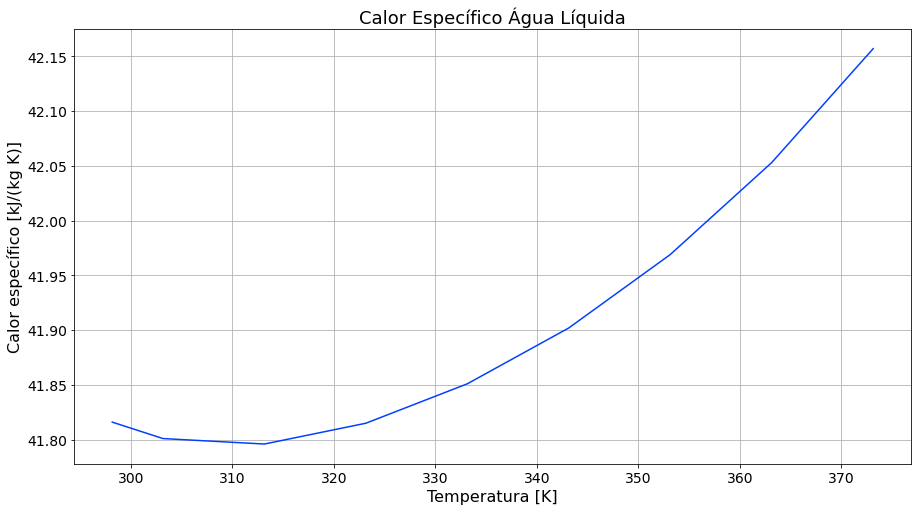

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x=data_temperatura_agua,y=data_cv_agua)

#ax.errorbar(x=columns_names,y=df_statistics.iloc[1,0:],yerr=df_statistics.iloc[2,0:],ls='none',color='black',capsize=5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_title('Calor Específico Água Líquida',fontsize = 18)
plt.xlabel('Temperatura [K]',fontsize=16)
plt.ylabel('Calor específico [kJ/(kg K)]',fontsize=16)
ax.grid() #cria a grid
ax.set_axisbelow(True) #coloca a grid para trás
plt.show()
#fig.get_figure() #'pega' o gráfico para salvar
#fig.savefig("malthus_runge.png", facecolor='white') #salva o gráfico 

### Calor Latente de Vaporização:
Considerando uma aproximação para o Calor Latente: $$ \\ $$
$$ Q = m*L \\ $$
Tal que: $$ L = 2.25*10^3 $$ J/Kg

In [8]:
### explicar por que não pegados de uma tabela

In [9]:
df_vapor_kelvin = pd.read_table('cv_vapor_txt.txt')
#df_vapor_kelvin

In [10]:
data_cv_vapor = (df_vapor_kelvin.iloc[8:18,1]).to_numpy()
#print(data_cv_vapor)
data_temperatura_vapor = (df_vapor_kelvin.iloc[8:18,0]).to_numpy()
#print(data_temperatura_vapor)

The values above apply to undissociated states. At high temperatures above 1500 K dissociation becomes appreciable and pressure is a significant variable.

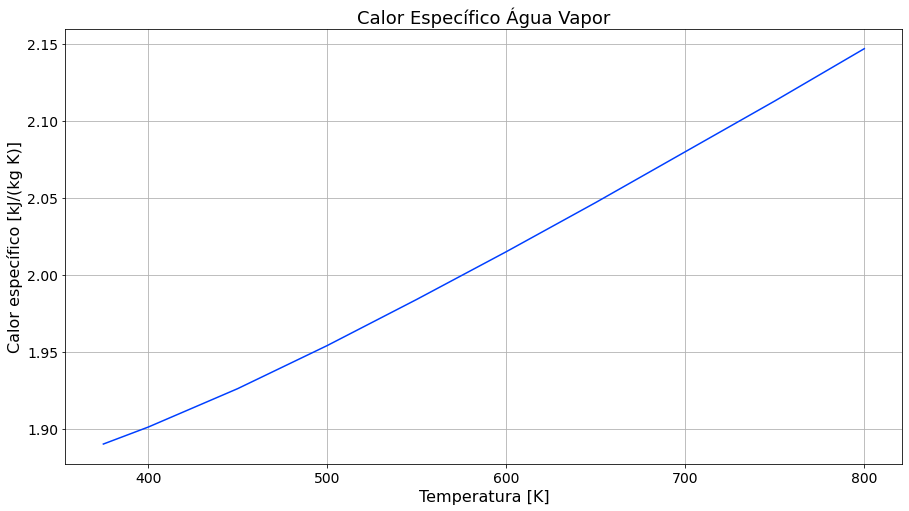

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x=data_temperatura_vapor,y=data_cv_vapor)

#ax.errorbar(x=columns_names,y=df_statistics.iloc[1,0:],yerr=df_statistics.iloc[2,0:],ls='none',color='black',capsize=5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_title('Calor Específico Água Vapor',fontsize = 18)
plt.xlabel('Temperatura [K]',fontsize=16)
plt.ylabel('Calor específico [kJ/(kg K)]',fontsize=16)
ax.grid() #cria a grid
ax.set_axisbelow(True) #coloca a grid para trás
plt.show()
#fig.get_figure() #'pega' o gráfico para salvar
#fig.savefig("malthus_runge.png", facecolor='white') #salva o gráfico 

In [12]:
def massa_agua(index_1,energia_fornecida=energia_sistema,calor_especifico_agua=data_cv_agua, calor_especifico_vapor=data_cv_vapor,calor_latente=2.25e3, temperatura_agua=data_temperatura_agua, temperatura_vapor=data_temperatura_vapor):
    
    integral_agua = integrate.trapezoid(x=calor_especifico_agua,y=temperatura_agua) #integral até 100C
    #print(integral_agua)
        
    for i in range(1,index_1+1):
        integral_vapor = integrate.trapezoid(x=calor_especifico_vapor[0:i],y=temperatura_vapor[0:i])
        valor_temperatura = temperatura_vapor[i]
        #print(integral_vapor)
        m_agua = energia_fornecida/(integral_agua + integral_vapor + calor_latente) #somar calor latente?
        #print(integral_agua + integral_vapor + calor_latente)
        print(f'a massa de agua em Kg corresponde a: {np.round(np.abs(m_agua),2)}, à temperatura: {valor_temperatura} K')

In [13]:
massa_agua(index_1=len(data_cv_vapor)-1)

a massa de agua em Kg corresponde a: 6987.44, à temperatura: 400 K
a massa de agua em Kg corresponde a: 6974.9, à temperatura: 450 K
a massa de agua em Kg corresponde a: 6943.83, à temperatura: 500 K
a massa de agua em Kg corresponde a: 6905.34, à temperatura: 550 K
a massa de agua em Kg corresponde a: 6860.3, à temperatura: 600 K
a massa de agua em Kg corresponde a: 6810.03, à temperatura: 650 K
a massa de agua em Kg corresponde a: 6754.49, à temperatura: 700 K
a massa de agua em Kg corresponde a: 6693.7, à temperatura: 750 K
a massa de agua em Kg corresponde a: 6629.6, à temperatura: 800 K


# Processo 1 - 2

Primeiramente, a água encontra-se a baixa pressão, que vamos considerar aqui como 1 atm, o que é perfeitamente possível para um ciclo de Rankine real. Para chegar ao ponto dois, o fluído é pressurizado por uma bomba até altas pressões, tipicamente em torno de 10 MPa, que é o valor que escolhemos para o nosso boiler. Essa compressão gera o aumento de temperatura que observamos em 1-2 e podemos calcular usando a primeira lei da termodinâmica $$ Q = W + \Delta U $$ considerando que esse processo é aproximadamente adiabático, ou seja, $Q = 0$, então  $$ -W = \Delta U $$ Para calcular o trabalho precisamos saber a variação do volume. A compressibilidade da água é aproximadamente $4.4\cdot 10^{-10}$ Pa $^{-1}$ portanto a variação do volume é: $$ \Delta V = 4.4\cdot 10^{-10} \Delta P V_i = 4.4\cdot 10^{-10} (10^7 - 10^5)V_i $$ com a massa calculada anteriormente e a densidade da água, calculamos que $ \Delta V = 0.03 m^3$. Com isso, o trabalho realizado é $$ W = \int_{V_i}^{V_f} P dV \approx = 6.881 * ( 10^5 - 10^7) = - 68121900 J = -\Delta U$$ Portanto a variação de temperatura é $$ \Delta T = \Delta U/C = 68121900/(6860.3 \cdot 4186) = 2.4 K$$ Ou seja, a variação de temperatura do processo 1 - 2 é muito pequena, precisamos dar um zoom no diagrama T-S para observar esse processo:

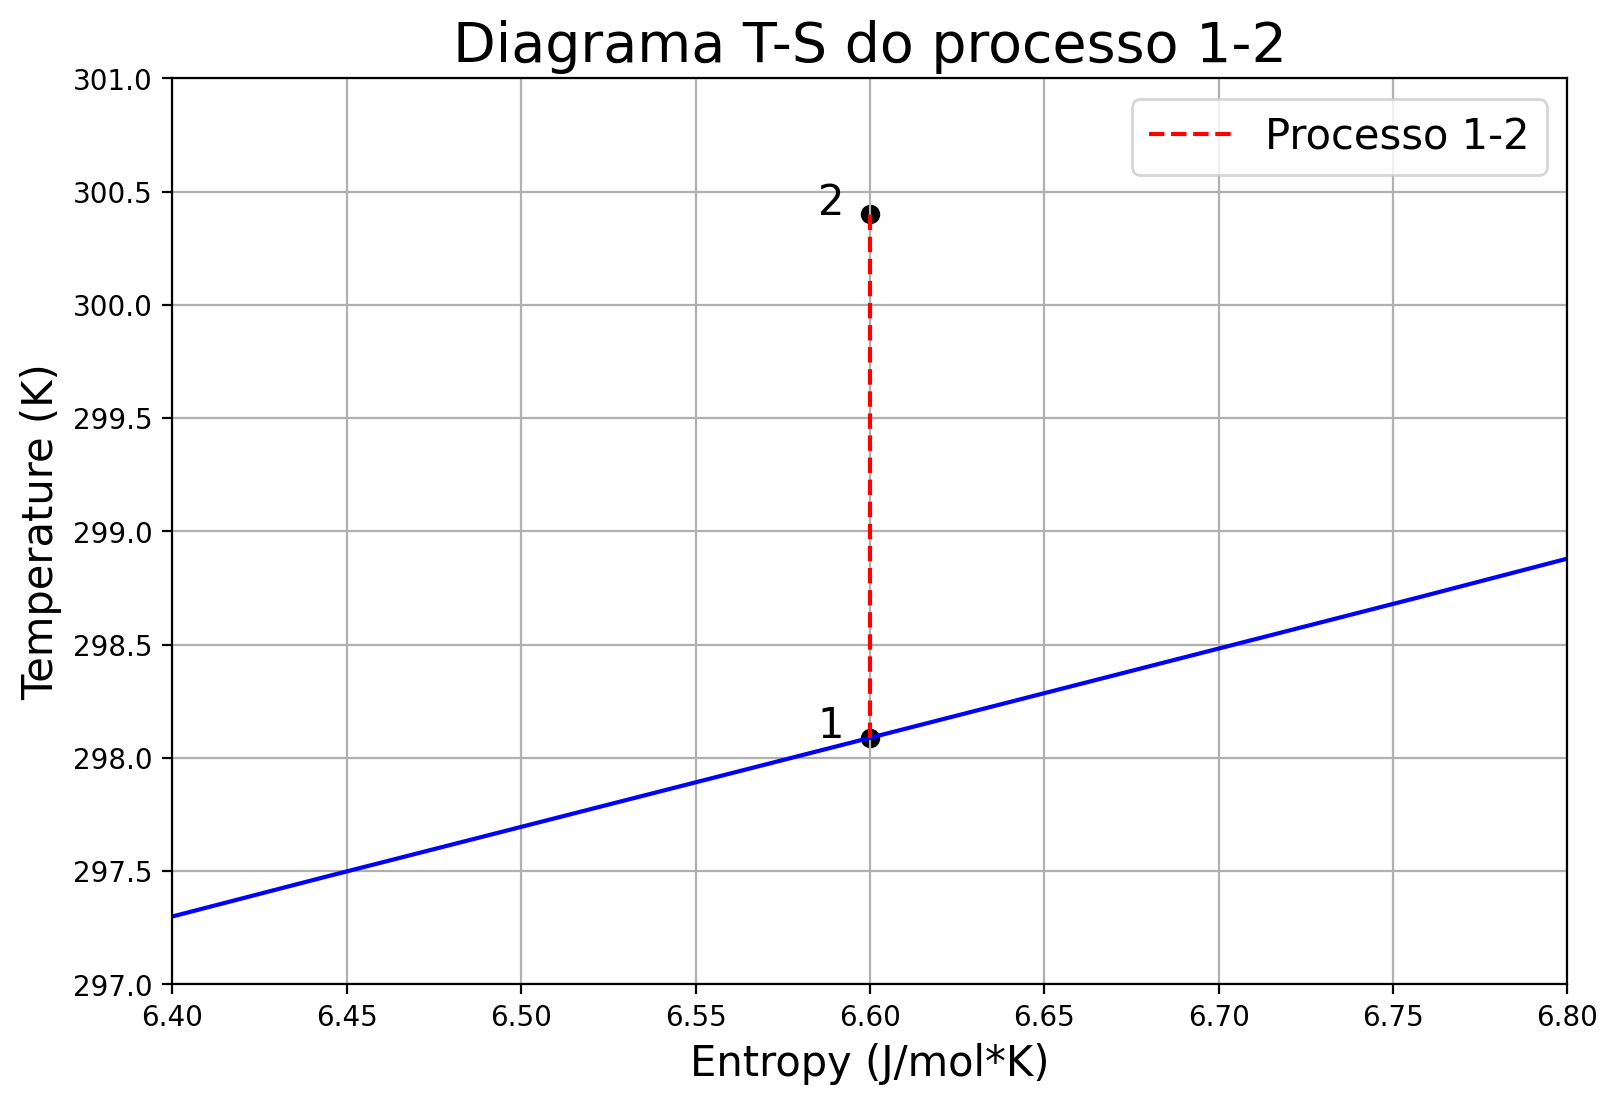

In [14]:
vapor = pd.read_csv('dados_vap.csv')
liq = pd.read_csv('dados_liq.csv')
fig = plt.figure(figsize=(9,6), dpi=200)
ax = fig.add_subplot(1,1,1)
ax.plot(liq["Entropy (J/mol*K)"],liq["Temperature (K)"], c = 'b')
ax.set_xlabel("Entropy (J/mol*K)",fontsize = 15)
ax.set_ylabel("Temperature (K)",fontsize = 15)
ax.grid('--')
xprocesso12 = [6.6,6.6]
yprocesso12 = [298.09, 300.4] 
ax.scatter(xprocesso12,yprocesso12, c = '0')
ax.plot(xprocesso12,yprocesso12, '--', c = 'r', label = 'Processo 1-2')
ax.legend(fontsize = 15)
ax.set_xlim(6.4,6.8)
ax.set_ylim(297, 301)
ax.text(6.585, 298.09, '1', fontsize = 15)
ax.text(6.585, 300.4, '2', fontsize = 15)
ax.set_title('Diagrama T-S do processo 1-2', fontsize = 20)
plt.show()

# Processo 2 - 3

O processo 2 - 3, que corresponde ao boiler, é possui a variação de temperatura já calculada quando calculamos a massa de água. Os valores mais importantes desse processo nós já calculamos, são:
+ $Q_{input} -16565484.57$ kJ
+ $ \Delta T = 299.4 K$
+ $\Delta S = 92 $ J/(molK)


Gráficamente, o processo 2 - 3 fica:

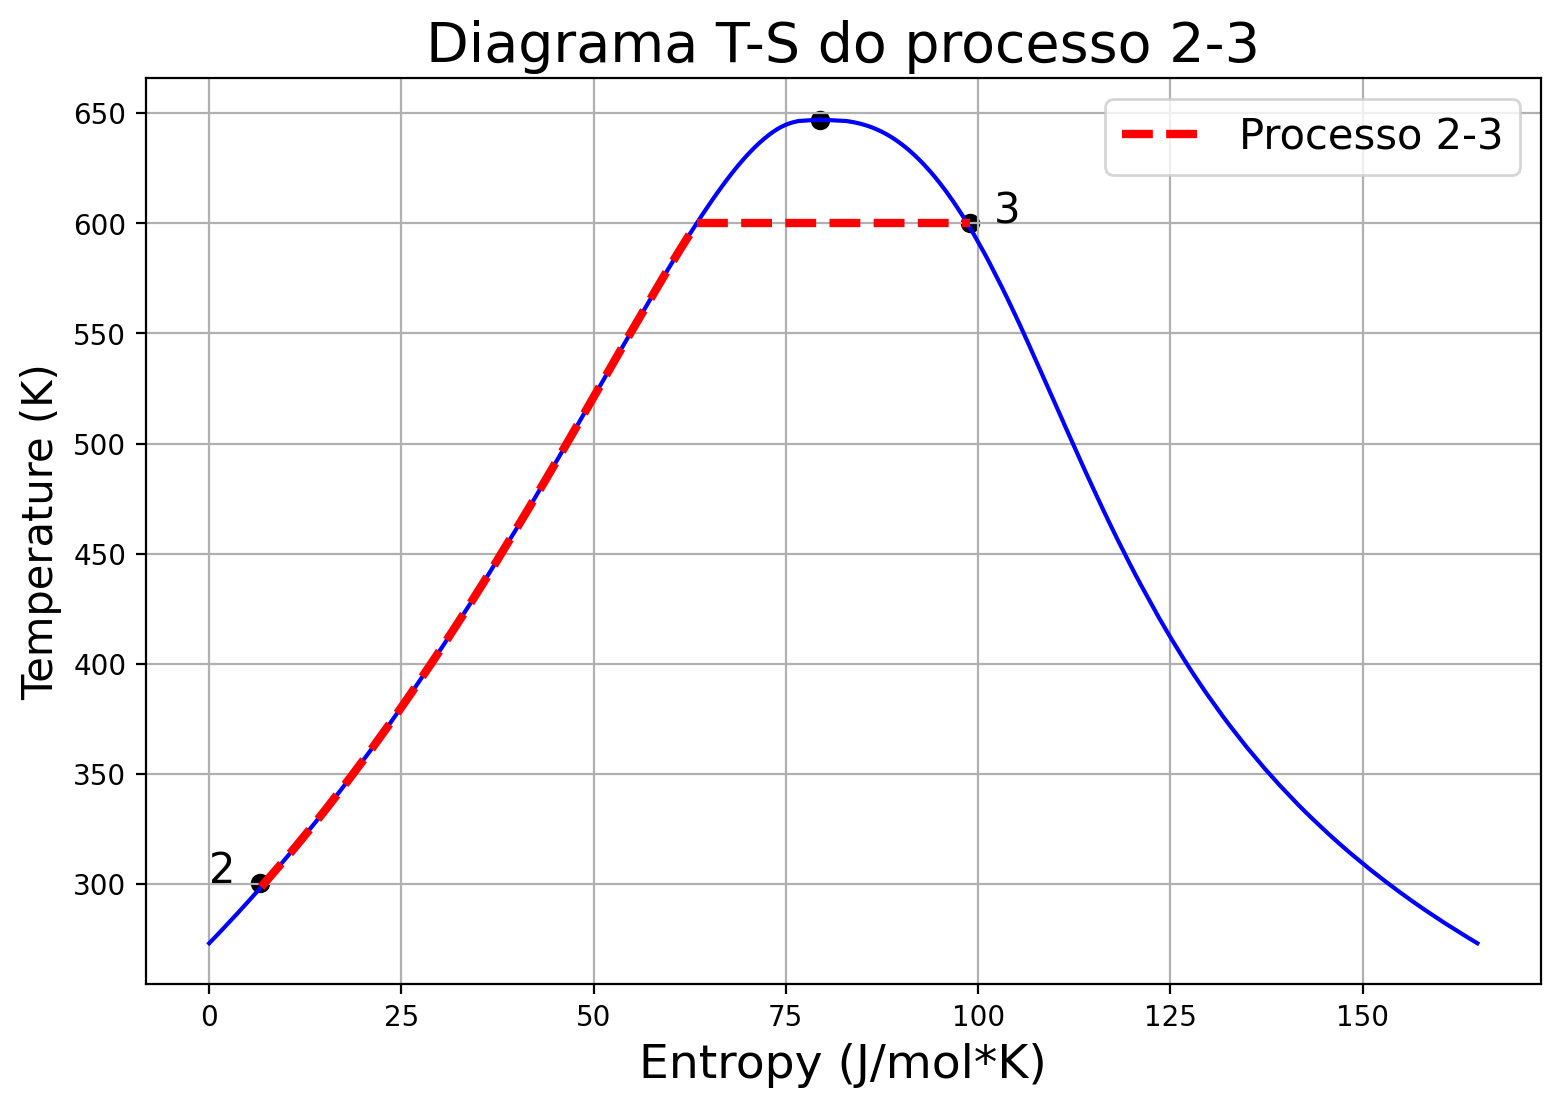

In [15]:
fig = plt.figure(figsize=(9,6), dpi=200)
ax = fig.add_subplot(1,1,1)
ax.plot(liq["Entropy (J/mol*K)"],liq["Temperature (K)"], c = 'b')
ax.plot(vapor["Entropy (J/mol*K)"],vapor["Temperature (K)"], c = 'b')
ax.scatter(list(liq["Entropy (J/mol*K)"])[-1],list(liq["Temperature (K)"])[-1], c = '0')

ax.plot(list(liq["Entropy (J/mol*K)"])[41:525],list(liq["Temperature (K)"])[41:525],
        '--', c = 'r', label = 'Processo 2-3', linewidth = 3)
ax.plot([63.4, 99], [600, 600],'--', c = 'r', linewidth = 3)
xprocesso23 = [6.6, 99]
yprocesso23 = [300.4, 600] 
ax.scatter(xprocesso23,yprocesso23, c = '0')
ax.text(0, 300.4, '2', fontsize = 15)
ax.text(102, 600, '3', fontsize = 15)

ax.set_xlabel("Entropy (J/mol*K)",fontsize = 17)
ax.set_ylabel("Temperature (K)",fontsize = 15)
ax.grid('--')
ax.set_title('Diagrama T-S do processo 2-3', fontsize = 20)
ax.legend(fontsize = 15)
plt.show()

# Processo 3 - 4

Agora é o processo em que o vapor passa pela turbina para gerar trabalho. No nosso caso vamos considerar a aproximação isentrópica, o que é uma idealização, já que na realidade o processo não é perfeitamente reversível, e a entropia aumenta. Além disso, a temperatura final deve ser a temperatura do início do ciclo novamente, que no nosso caso é a temperatura ambiente de 298 K. Os pricipais valores nesse processo são:
+ $\Delta T = 302.4$ K
+ $\Delta S = 0$

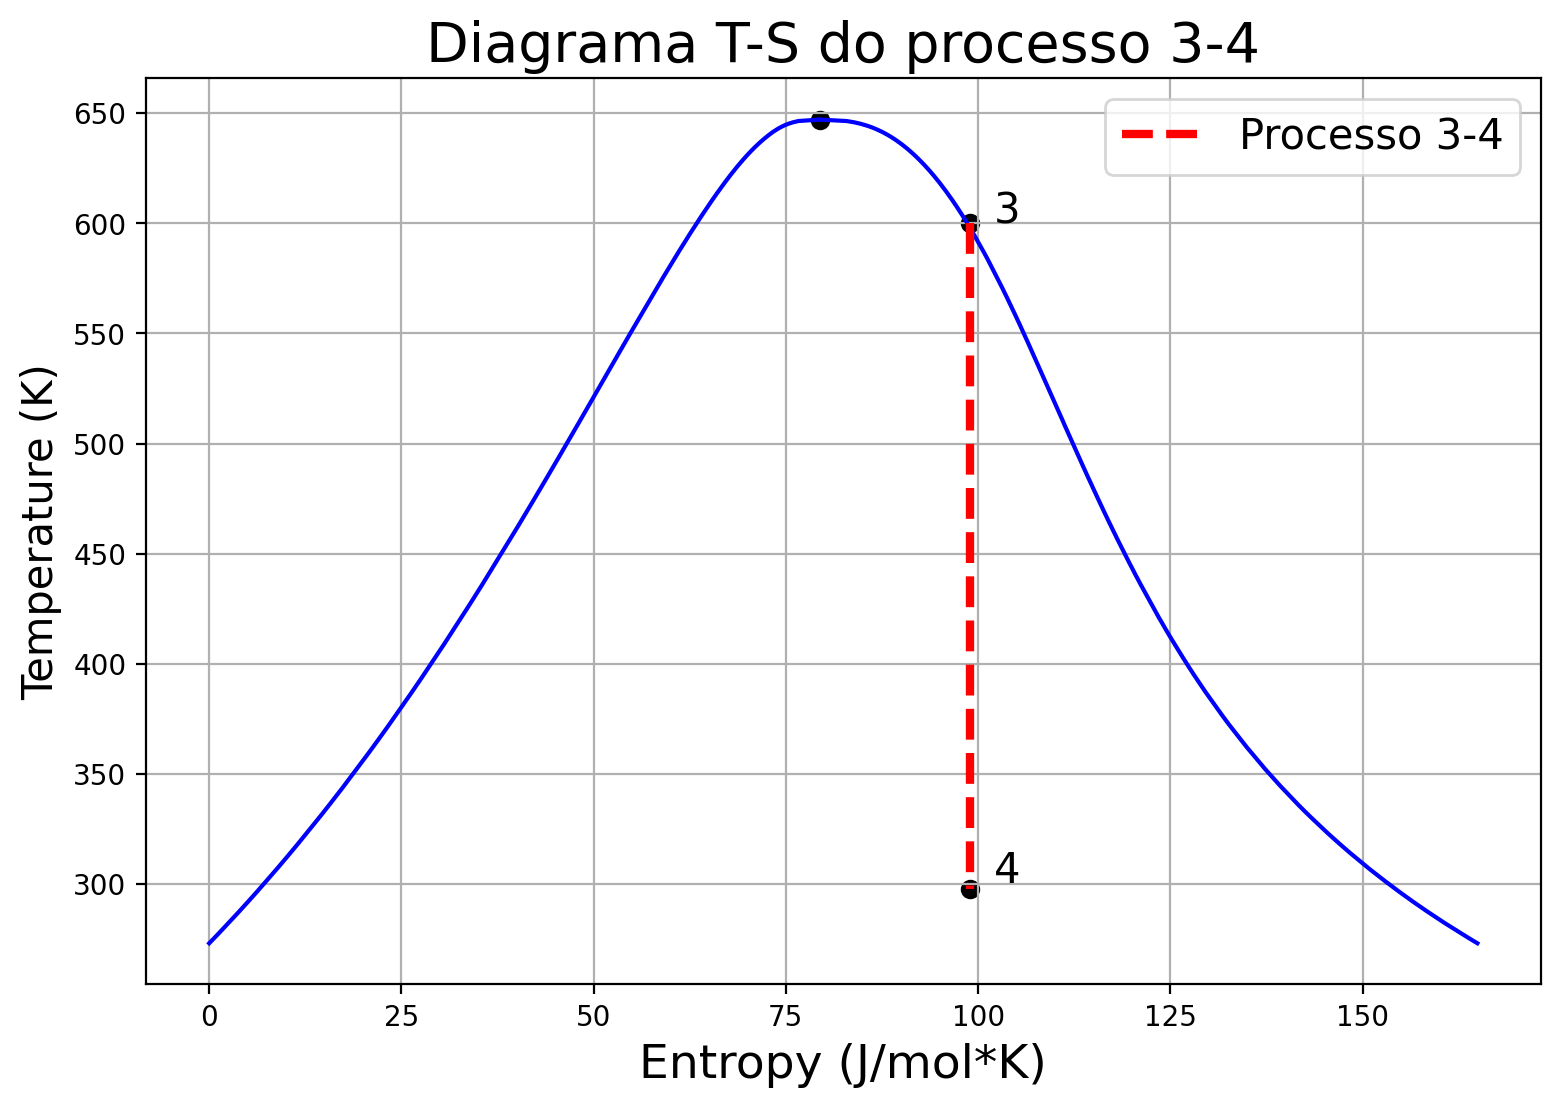

In [16]:
fig = plt.figure(figsize=(9,6), dpi=200)
ax = fig.add_subplot(1,1,1)
ax.plot(liq["Entropy (J/mol*K)"],liq["Temperature (K)"], c = 'b')
ax.plot(vapor["Entropy (J/mol*K)"],vapor["Temperature (K)"], c = 'b')
ax.scatter(list(liq["Entropy (J/mol*K)"])[-1],list(liq["Temperature (K)"])[-1], c = '0')
xprocesso34 = [99, 99]
yprocesso34 = [600,298]
ax.plot(xprocesso34,yprocesso34,'--', c = 'r', linewidth = 3 , label = 'Processo 3-4')
ax.scatter(xprocesso34,yprocesso34, c = '0')
ax.text(102, 600, '3', fontsize = 15)
ax.text(102, 300.4, '4', fontsize = 15)

ax.set_xlabel("Entropy (J/mol*K)",fontsize = 17)
ax.set_ylabel("Temperature (K)",fontsize = 15)
ax.grid('--')
ax.set_title('Diagrama T-S do processo 3-4', fontsize = 20)
ax.legend(fontsize = 15)
plt.show()

## Trabalho da turbina

Para calcular o trabalho da turbina, precisamos multiplicar a variação de entalpia $\Delta H$ pela efinciencia da turbina, $\eta_{turb}$. A variação da entalpia pode ser calculada pela integral do calor específico pela temperatura:

$$ \Delta H = \int_{T_i}^{T_f} C_p(T) dT $$ Para isso, precisamos dos dados de $C_p (T)$

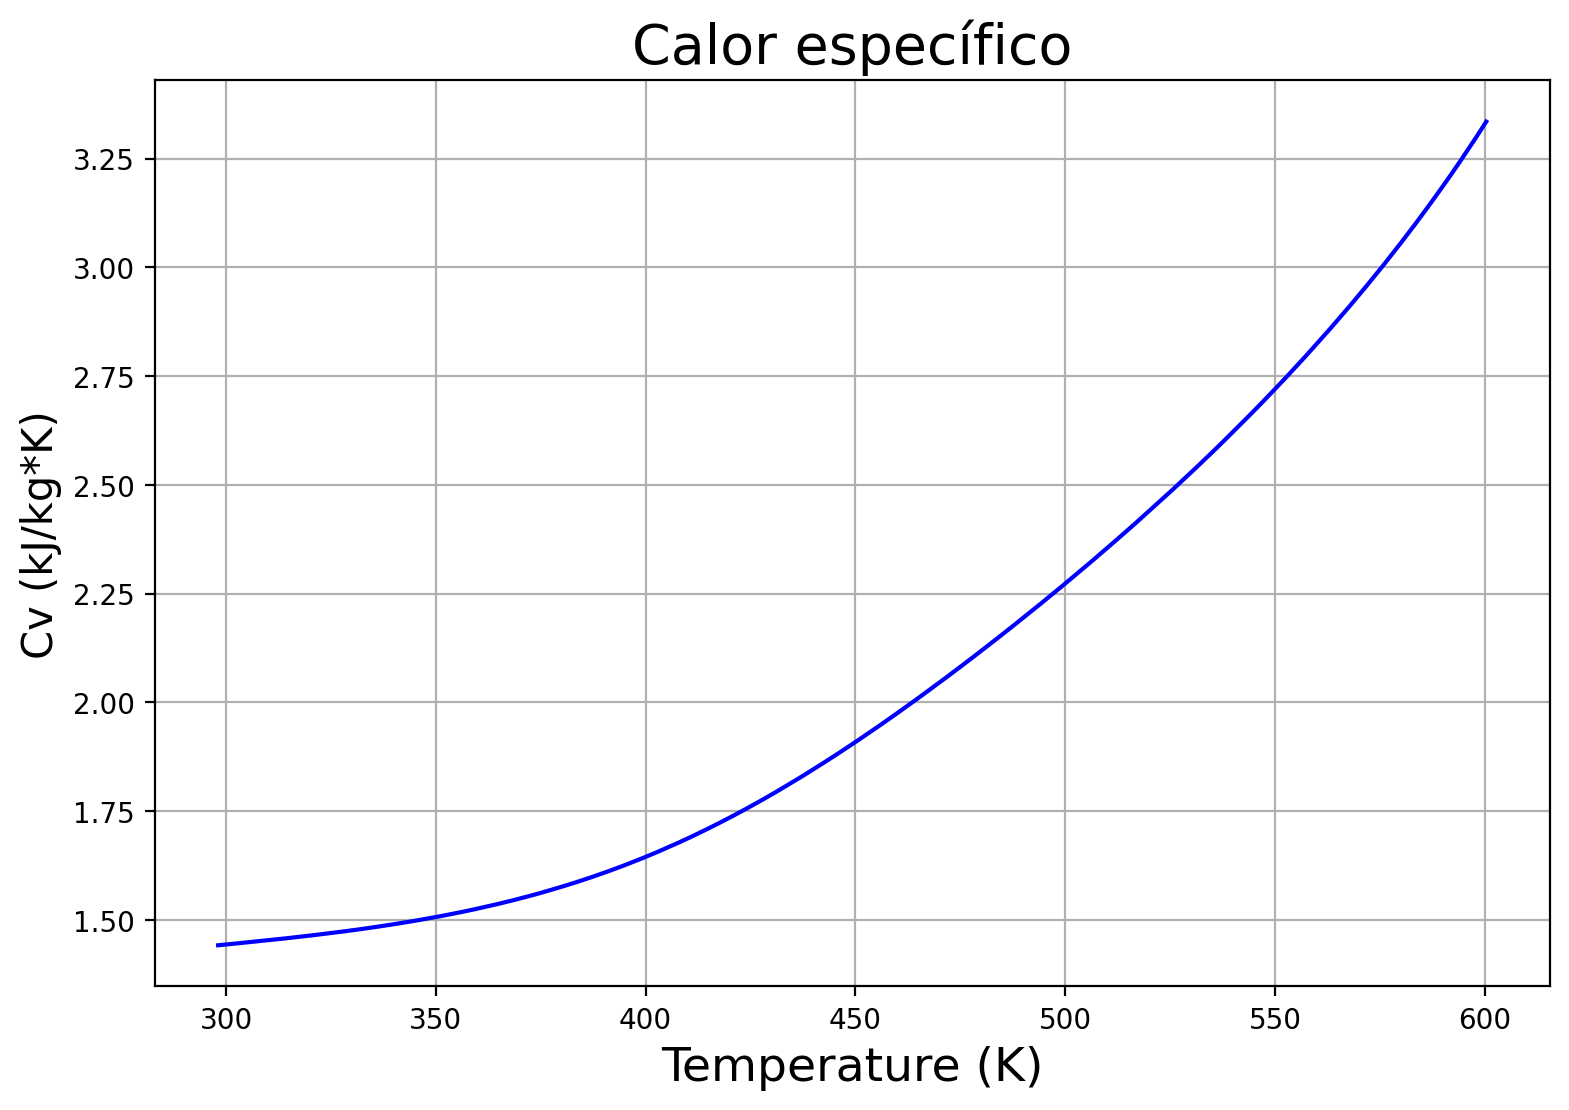

In [17]:
T = list(vapor['Temperature (K)'])[40:526]
Cv1 = list(vapor['Cv (J/mol*K)'])[40:526]
Cv = []
for i in Cv1:
    Cv.append(float(i))
Cv = np.array(Cv)/18

fig = plt.figure(figsize=(9,6), dpi=200)
ax = fig.add_subplot(1,1,1)
ax.plot(T,Cv, c = 'b')
ax.set_xlabel("Temperature (K)",fontsize = 17)
ax.set_ylabel("Cv (kJ/kg*K)",fontsize = 15)
ax.grid('--')
ax.set_title('Calor específico', fontsize = 20)
plt.show()

In [18]:
integral_entalpia = integrate.trapezoid(x=T,y=Cv) 
print('A variação de entalpia da água ao passar na turbina foi de ',f'{ integral_entalpia*6860.3} kJ')

A variação de entalpia da água ao passar na turbina foi de  4274348.624242751 kJ


Agora é preciso levar em consideração a eficiência da turbina, pois ela não é capaz de converter 100% do disponível em trabalho, já que, pela lei da continuidade, a velocidade jusante do vapor não pode ser 0. Tipicamente considera-se que a eficiência máxima para uma turbina a vapor é cerca de 60% (no caso ideal). Portanto vamos considerar que o trabalho total gerado na turbina é:

$$ W_{turb} = 60 \% \Delta H = 2564609.172 \text{  kJ}$$

# Processo 4 - 1

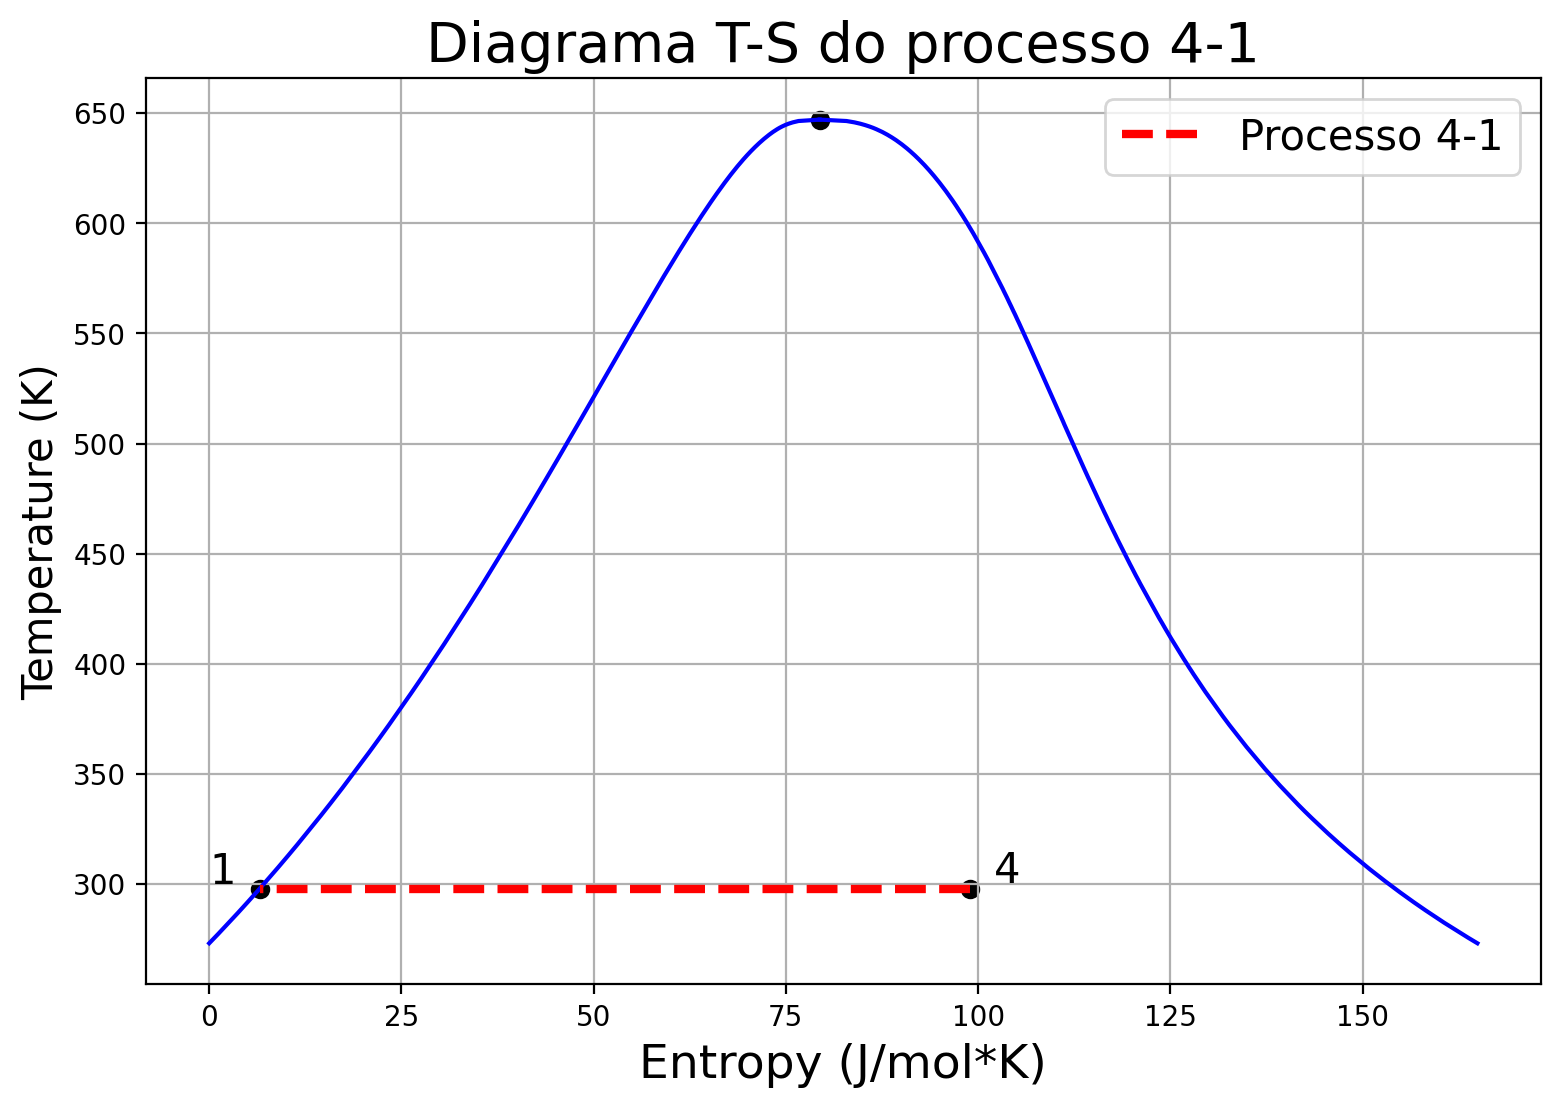

In [19]:
fig = plt.figure(figsize=(9,6), dpi=200)
ax = fig.add_subplot(1,1,1)
ax.plot(liq["Entropy (J/mol*K)"],liq["Temperature (K)"], c = 'b')
ax.plot(vapor["Entropy (J/mol*K)"],vapor["Temperature (K)"], c = 'b')
ax.scatter(list(liq["Entropy (J/mol*K)"])[-1],list(liq["Temperature (K)"])[-1], c = '0')
xprocesso41 = [99, 6.6]
yprocesso41 = [298,298]
ax.plot(xprocesso41,yprocesso41,'--', c = 'r', linewidth = 3 , label = 'Processo 4-1')
ax.scatter(xprocesso41,yprocesso41, c = '0')
ax.text(0, 300, '1', fontsize = 15)
ax.text(102, 300.4, '4', fontsize = 15)

ax.set_xlabel("Entropy (J/mol*K)",fontsize = 17)
ax.set_ylabel("Temperature (K)",fontsize = 15)
ax.grid('--')
ax.set_title('Diagrama T-S do processo 4-1', fontsize = 20)
ax.legend(fontsize = 15)
plt.show()

# Ciclo completo

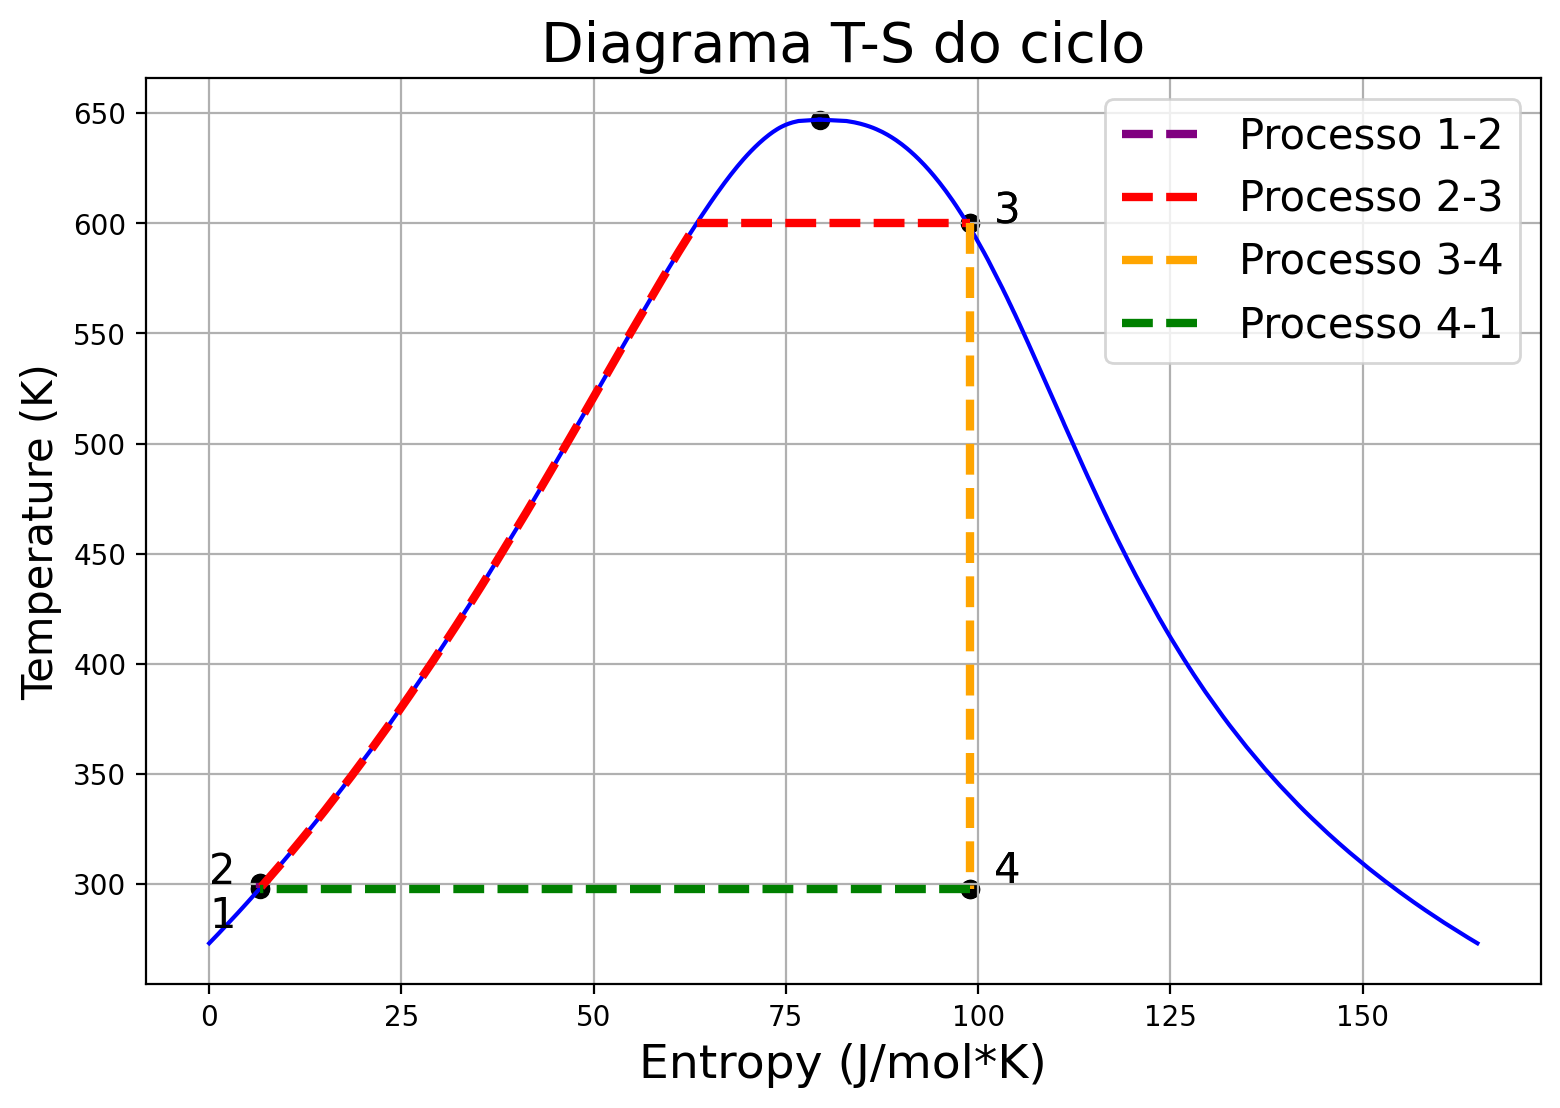

In [20]:
fig = plt.figure(figsize=(9,6), dpi=200)
ax = fig.add_subplot(1,1,1)
ax.plot(liq["Entropy (J/mol*K)"],liq["Temperature (K)"], c = 'b')
ax.plot(vapor["Entropy (J/mol*K)"],vapor["Temperature (K)"], c = 'b')
ax.scatter(list(liq["Entropy (J/mol*K)"])[-1],list(liq["Temperature (K)"])[-1], c = '0')
xprocesso12 = [6.6,6.6]
yprocesso12 = [298.09, 300.4] 
ax.scatter(xprocesso12,yprocesso12, c = '0')
ax.plot(xprocesso12,yprocesso12, '--', c = 'purple', label = 'Processo 1-2',linewidth = 3)
ax.plot(list(liq["Entropy (J/mol*K)"])[41:525],list(liq["Temperature (K)"])[41:525],
        '--', c = 'r', label = 'Processo 2-3', linewidth = 3)
ax.plot([63.4, 99], [600, 600],'--', c = 'r', linewidth = 3)
xprocesso23 = [6.6, 99]
yprocesso23 = [300.4, 600] 
ax.scatter(xprocesso23,yprocesso23, c = '0')
ax.text(0, 300, '2', fontsize = 15)
ax.text(102, 600, '3', fontsize = 15)
xprocesso34 = [99, 99]
yprocesso34 = [600,298]
ax.plot(xprocesso34,yprocesso34,'--', c = 'orange', linewidth = 3 , label = 'Processo 3-4')
ax.scatter(xprocesso34,yprocesso34, c = '0')
ax.text(102, 600, '3', fontsize = 15)
ax.text(102, 300.4, '4', fontsize = 15)
xprocesso41 = [99, 6.6]
yprocesso41 = [298,298]
ax.plot(xprocesso41,yprocesso41,'--', c = 'g', linewidth = 3 , label = 'Processo 4-1')
ax.scatter(xprocesso41,yprocesso41, c = '0')
ax.text(0, 280, '1', fontsize = 15)
ax.text(102, 300.4, '4', fontsize = 15)

ax.set_xlabel("Entropy (J/mol*K)",fontsize = 17)
ax.set_ylabel("Temperature (K)",fontsize = 15)
ax.grid('--')
ax.set_title('Diagrama T-S do ciclo', fontsize = 20)
ax.legend(fontsize = 15)
plt.show()

# Eficiência do ciclo

Por fim, temos que a eficiência do ciclo pode ser calculada como:

$$ e = \frac{\text{benefício}}{\text{custo}} = \frac{W_{net}}{Q_{in}} \approx \frac{W_{thermal} - W}{Q_in} \approx  \frac{W_{turbine}}{Q_in} \approx \frac{2564609.172}{16565484.57} = 0.15 = 15 \text{%}$$

Essa aproximação pode ser feita pois o trabalho da bomba corresponde a, em geral, 1% do trabalho da turbina no ciclo.

Caso o ciclo fosse um ciclo de Carnot, a eficiência seria:

$$ e = 1 - \frac{T_c}{T_h} = \frac{298}{600} \approx 50\text{ %}$$

Portanto, vemos que o ciclo de Rankine ideal é uma aproximação mais realista de um ciclo real do que o ciclo de Carnot

### Referências Bibliográficas:
* Máquina de Calor: An Introduction to Thermal Physics (Schroeder, Daniel V.) - Cap. 4
* Ciclo de Carnot: An Introduction to Thermal Physics (Schroeder, Daniel V.) - Cap. 4
* Eficiência do Ciclo de Carnot: An Introduction to Thermal Physics (Schroeder, Daniel V.) - Cap. 4
* Ciclo de Rankine: https://en.wikipedia.org/wiki/Rankine_cycle#Description
* Ciclo de Rankine Não Ideal: https://www.electrical4u.com/ideal-verses-actual-in-rankine-cycle/#:~:text=Critical%20Point%20(CP)%20is%20in,called%20sub%2Dcooled%20liquid%20regions.
* Ciclo de Carnot x Ciclo de Rankine: An Introduction to Thermal Physics (Schroeder, Daniel V.) - Cap. 4; https://www.mechanicalfunda.com/2017/12/difference-rankine-carnot-cycle.html
* Água e Ciclo de Rankine: An Introduction to Thermal Physics (Schroeder, Daniel V.) - Cap. 4
* Ponto Crítico da Água: http://web.mit.edu/8.334/www/grades/projects/projects08/TheodoreGolfinopoulos/text2.html#:~:text=There's%20a%20special%20mix%20of,atmosphere%20at%20sea%20level!).


#### Arquivos:
* cv_agua_txt: https://www.engineeringtoolbox.com/specific-heat-capacity-water-d_660.html
* cv_vapor_txt: https://www.engineeringtoolbox.com/water-vapor-d_979.html
* dados_liq: https://webbook.nist.gov/chemistry/fluid/
* dados_vap: https://webbook.nist.gov/chemistry/fluid/

#### Imagens:
* Figura 1: An Introduction to Thermal Physics (Schroeder, Daniel V.) - Cap. 4
* Figura 2: https://commons.wikimedia.org/wiki/File:Cicle_de_Rankine_Diagrama_T-S.PNG
* Figura 3: https://www.youtube.com/watch?v=SwCdae4Q_QE&t=703s&ab_channel=BESTMECHANICALENGINEERING
* Figura 4: https://www.researchgate.net/figure/Schematic-water-phase-diagram-Below-the-critical-point-that-is-374-K-and-218-atm-the_fig2_338142645